In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv(r'D:\book\decision_tree\homework\week1\C4.5_homework.txt', header=None, sep = '\s+')

In [3]:
dataset = dataset.iloc[:, 1:]
dataset.columns = ['outlook', 'temperature', 'humidity', 'wind', 'label']

In [4]:
dataset

,outlook,temperature,humidity,wind,label
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes
5,Rain,65,70,Strong,No
6,Overcast,64,65,Strong,Yes
7,Sunny,72,95,Weak,No
8,Sunny,69,70,Weak,Yes
9,Rain,75,80,Weak,Yes


In [5]:
dataset['label'].value_counts()

Yes    9
No     5
Name: label, dtype: int64

In [6]:
entropy_dataset = - ((9 / 14) * np.log2(9 / 14) + (5 / 14) * np.log2(5 / 14))
entropy_dataset

0.94028595867063114

In [7]:
# 求每个特征的IV值
print(dataset['outlook'].value_counts())
print(dataset['temperature'].value_counts())
print(dataset['humidity'].value_counts())
print(dataset['wind'].value_counts())

Rain        5
Sunny       5
Overcast    4
Name: outlook, dtype: int64
75    2
72    2
71    1
81    1
64    1
69    1
70    1
85    1
68    1
83    1
65    1
80    1
Name: temperature, dtype: int64
80    3
70    3
90    2
95    1
78    1
75    1
85    1
65    1
96    1
Name: humidity, dtype: int64
Weak      8
Strong    6
Name: wind, dtype: int64


In [8]:
#先计算离散值的IV
IV_outlook = -( (2 * (5 / 14) * np.log2(5 / 14)) + (4 / 14 * np.log2(4 / 14)) )
print('IV_outlook:', IV_outlook)

IV_wind = -( (8 / 14 * np.log2(8 / 14)) + (6 / 14 * np.log2(6 / 14)) )
print('IV_wind:', IV_wind)

IV_outlook: 1.57740628285
IV_wind: 0.985228136034


In [9]:
num_datasets = len(dataset)
print(num_datasets)

14


#  第一次分叉

## 计算每个特征的信息增益率

### 计算outlook的信息增益率

In [10]:
print(dataset['outlook'].value_counts())
print(dataset.groupby(['outlook'])['label'].value_counts())

Rain        5
Sunny       5
Overcast    4
Name: outlook, dtype: int64
outlook   label
Overcast  Yes      4
Rain      Yes      3
          No       2
Sunny     No       3
          Yes      2
Name: label, dtype: int64


In [11]:
entropy_outlook = -( (5 / num_datasets) * ( 2 / 5 * np.log2(2 / 5) + 3 / 5 * np.log2(3 / 5)) ) - \
( (5 / num_datasets) * ( (2 / 5) * np.log2(2 / 5) + (3 / 5) * np.log2(3 / 5)) )
#print(entropy_dataset - entropy_outlook)
entropy_ratio_outlook = (entropy_dataset - entropy_outlook) / IV_outlook
print(entropy_ratio_outlook)

0.156427562421


### 计算wind的信息增益率

In [12]:
print(dataset['wind'].value_counts())
print(dataset.groupby(['wind'])['label'].value_counts())

Weak      8
Strong    6
Name: wind, dtype: int64
wind    label
Strong  No       3
        Yes      3
Weak    Yes      6
        No       2
Name: label, dtype: int64


In [13]:
entropy_wind = -( (6 / num_datasets) * ( 3 / 6 * np.log2(3 / 6) + 3 / 6 * np.log2(3 / 6)) ) - \
( (8 / num_datasets) * ( (2 / 8) * np.log2(2 / 8) + (6 / 8) *  np.log2(6 / 8)) )
#print(entropy_dataset - entropy_wind)
entropy_ratio_wind = (entropy_dataset - entropy_wind) / IV_wind
print(entropy_ratio_wind)

0.0488486155115


### 计算tempearture的信息增益率

In [100]:
continuous_cost = np.log2(dataset['temperature'].nunique() - 1)/ num_datasets
continuous_cost

0.24710225847409267

In [49]:
dataset[['temperature', 'label']].sort_values(by = 'temperature')

#根据http://info.psu.edu.sa/psu/cis/asameh/cs-500/dm7-decision-tree-c45.ppt，我们的划分点应该为
# 64.5 66.5 70.5 72 72 77.5 80.5 84

,temperature,label
6,64,Yes
5,65,No
4,68,Yes
8,69,Yes
3,70,Yes
13,71,No
7,72,No
11,72,Yes
9,75,Yes
10,75,Yes


#### 64.5进行划分

In [43]:
labels_temperature_64_5 = dataset[dataset['temperature'] > 64.5]['label'].value_counts()
print(labels_temperature_64_5)
print()
print(len(dataset[dataset['temperature'] > 64.5]))
print()
print(dataset[dataset['temperature'] < 64.5]['label'].value_counts())

Yes    8
No     5
Name: label, dtype: int64

13

Yes    1
Name: label, dtype: int64


In [102]:
IV_temperature_64_5 = - ( (13 / 14) * np.log2(13 / 14) + ( (1 / 14) * np.log2(1 / 14) ) ) #这里踩了个坑，没有加括号，求出来为负值了
print(IV_temperature_64_5)
entropy_temperature_64_5 = -( (13 / 14) * ( (8 / 13) * np.log2(8 / 13) + (5 / 13 * np.log2(5 / 13)) ) )
print(entropy_temperature_64_5)
entropy_ratio_temperature_64_5 = (entropy_dataset - entropy_temperature_64_5 - continuous_cost) / IV_temperature_64_5
print('result entropy_ratio_temperature_64_5:', entropy_ratio_temperature_64_5)

0.371232326641
0.892576847243
result entropy_ratio_temperature_64_5: -0.537111487166


#### 66.5进行划分

In [54]:
labels_temperature_66_5 = dataset[dataset['temperature'] > 66.5]['label'].value_counts()
print(labels_temperature_66_5)
print()
print(len(dataset[dataset['temperature'] > 66.5]))
print()
print(dataset[dataset['temperature'] < 66.5]['label'].value_counts())

Yes    8
No     4
Name: label, dtype: int64

12

No     1
Yes    1
Name: label, dtype: int64


In [103]:
IV_temperature_66_5 = - ( (12 / 14) * np.log2(12 / 14) + ( (2 / 14) * np.log2(2 / 14) ) )
print(IV_temperature_66_5)

entropy_temperature_66_5 = -( (12 / 14) * (8 / 12 * np.log2(8 / 12) + ( (4 / 12) * np.log2(4 / 12))) ) - \
( (2 / 14) * ( (1 / 2) * np.log2(1 / 2) + ( (1 / 2) * np.log2(1 / 2)) ) )

print(entropy_temperature_66_5)

entropy_temperature_ratio_66_5 = (entropy_dataset - entropy_temperature_66_5 - continuous_cost) / IV_temperature_66_5
print('result entropy_ratio_temperature_66_5:', entropy_temperature_ratio_66_5)

0.591672778582
0.929967857761
result entropy_ratio_temperature_66_5: -0.400194442157


#### 70.5 进行划分

In [56]:
labels_temperature_70_5 = dataset[dataset['temperature'] > 70.5]['label'].value_counts()
print(labels_temperature_70_5)
print()
print(len(dataset[dataset['temperature'] > 70.5]))
print()
print(dataset[dataset['temperature'] < 70.5]['label'].value_counts())

Yes    5
No     4
Name: label, dtype: int64

9

Yes    4
No     1
Name: label, dtype: int64


In [104]:
IV_temperature_70_5 = - ( (5 / 14) * np.log2(5 / 14) + (9 / 14) * np.log2(9 / 14) ) 
print(IV_temperature_70_5)
entropy_temperature_70_5 = -( (9 / 14) * ( (5 / 9) * np.log2(5 / 9) + (4 / 9 * np.log2(4 / 9))) ) - \
( (5 / 14) * ( (1 / 5) * np.log2(1 / 5) + (4 / 5) * np.log2(4 / 5) ) )

entropy_ratio_temperature_70_5 = (entropy_dataset - entropy_temperature_70_5 - continuous_cost) / IV_temperature_70_5
print('result entropy_ratio_temperature_70_5:', entropy_ratio_temperature_70_5)

0.940285958671
result entropy_ratio_temperature_70_5: -0.214581622308


#### 72-进行划分

In [58]:
labels_temperature_72_ = dataset[dataset['temperature'] > 72]['label'].value_counts()
print(labels_temperature_72_)
print()
print(len(dataset[dataset['temperature'] > 72]))
print()
print(dataset[dataset['temperature'] <= 72]['label'].value_counts()) #这是个坑，需要注意

Yes    4
No     2
Name: label, dtype: int64

6

Yes    5
No     3
Name: label, dtype: int64


In [105]:
IV_temperature_72_ = -( (6 / 14) * np.log2(6 / 14) + (8 / 14) * np.log2(8 / 14) ) 
print(IV_temperature_72_)

entropy_temperature_72_ = -(6 / 14) * ( (4 / 6) * np.log2(4 / 6) +  (2 / 6) * np.log2(2 / 6) )   - \
(8 / 14) * ( (5 / 8) * np.log2(5 / 8) + ( (3 / 8) * np.log2(3 / 8)) )

entropy_ratio_temperature_72_ = (entropy_dataset - entropy_temperature_72_ - continuous_cost) / IV_temperature_72_
print('result entropy_ratio_temperature_72_:', entropy_ratio_temperature_72_)

0.985228136034
result entropy_ratio_temperature_72_: -0.249447317917


#### 72+进行划分

In [106]:
labels_temperature_72_add = dataset[dataset['temperature'] >= 72]['label'].value_counts()
print(labels_temperature_72_add)
print()
print(len(dataset[dataset['temperature'] >= 72]))
print()
print(dataset[dataset['temperature'] < 72]['label'].value_counts()) #这是个坑，需要注意

Yes    5
No     3
Name: label, dtype: int64

8

Yes    4
No     2
Name: label, dtype: int64


In [107]:
IV_temperature_72_add = -( (8 / 14) * np.log2(8 / 14) + (6 / 14) * np.log2(6 / 14) ) 
print(IV_temperature_72_add)

entropy_temperature_72_add = -(8 / 14) * ( (5 / 8 * np.log2(5 / 8) + ( (3 / 8) * np.log2(3 / 8))) ) - \
(6 / 14) * ( (2 / 6) * np.log2(2 / 6) + ( (4 / 6) * np.log2(4 / 6)) )

entropy_ratio_temperature_72_add = (entropy_dataset - entropy_temperature_72_add - continuous_cost) / IV_temperature_72_add
print('result entropy_ratio_temperature_72_add:', entropy_ratio_temperature_72_add)

0.985228136034
result entropy_ratio_temperature_72_add: -0.249447317917


#### 77.5进行划分

In [62]:
labels_temperature_77_5 = dataset[dataset['temperature'] > 77.5]['label'].value_counts()
print(labels_temperature_77_5)
print()
print(len(dataset[dataset['temperature'] > 77.5]))
print()
print(dataset[dataset['temperature'] < 77.5]['label'].value_counts())

No     2
Yes    2
Name: label, dtype: int64

4

Yes    7
No     3
Name: label, dtype: int64


In [108]:
IV_temperature_77_5 = - ( (4 / 14) * np.log2(4 / 14) + (10 / 14) * np.log2(10 / 14) ) 
print(IV_temperature_77_5)
entropy_temperature_77_5 = -( (4 / 14) * ( (2 / 4) * np.log2(2 / 4) + ( (2 / 4) * np.log2(2 / 4)) ) ) - \
( (10 / 14) * ( (7 / 10) * np.log2(7 / 10) + (3 / 10) * np.log2(3 / 10) ) )

entropy_ratio_temperature_77_5 = (entropy_dataset - entropy_temperature_77_5 - continuous_cost) / IV_temperature_77_5
print('result entropy_ratio_temperature_77_5:', entropy_ratio_temperature_77_5)

0.863120568567
result entropy_ratio_temperature_77_5: -0.257234149033


#### 80.5进行划分

In [67]:
labels_temperature_80_5 = dataset[dataset['temperature'] > 80.5]['label'].value_counts()
print(labels_temperature_80_5)
print()
print(len(dataset[dataset['temperature'] > 80.5]))
print()
print(dataset[dataset['temperature'] < 80.5]['label'].value_counts())

Yes    2
No     1
Name: label, dtype: int64

3

Yes    7
No     4
Name: label, dtype: int64


In [109]:
IV_temperature_80_5 = - ( (3 / 14) * np.log2(3 / 14) + (11 / 14) * np.log2(11 / 14) ) 
print(IV_temperature_80_5)
entropy_temperature_80_5 = -( (3 / 14) * ( (2 / 3) * np.log2(2 / 3) + ( (1 / 3) * np.log2(1 / 3)) ) ) - \
( (11 / 14) * ( (4 / 11) * np.log2(4 / 11) + (7 / 11) * np.log2(7 / 11) ) )

entropy_ratio_temperature_80_5 = (entropy_dataset - entropy_temperature_80_5- continuous_cost) / IV_temperature_80_5
print('result entropy_ratio_temperature_80_5:', entropy_ratio_temperature_80_5)

0.749595257259
result entropy_ratio_temperature_80_5: -0.328994596616


#### 84进行划分

In [69]:
labels_temperature_84 = dataset[dataset['temperature'] > 84]['label'].value_counts()
print(labels_temperature_84)
print()
print(len(dataset[dataset['temperature'] > 84]))
print()
print(dataset[dataset['temperature'] < 84]['label'].value_counts())

No    1
Name: label, dtype: int64

1

Yes    9
No     4
Name: label, dtype: int64


In [110]:
IV_temperature_84 = - ( (1 / 14) * np.log2(1 / 14) + (13 / 14) * np.log2(13 / 14) ) 
print(IV_temperature_84)

entropy_temperature_84 = -( (13 / 14) * ( (4 / 13) * np.log2(4 / 13) + ( (9 / 13) * np.log2(9 / 13)) ) )
print(entropy_temperature_84)

entropy_temperature_ratio_84 = (entropy_dataset - entropy_temperature_84 - continuous_cost) / IV_temperature_84
print('result entropy_ratio_temperature_84:', entropy_temperature_ratio_84)

0.371232326641
0.82688509449
result entropy_ratio_temperature_84: -0.360155581015


In [ ]:
# 发现减完论文中的常数后，都变成了负数

### 计算humidity的信息增益率

In [50]:
dataset[['humidity', 'label']].sort_values(by = 'humidity')

#划分点为67.5 70- 70+ 80- 80+ 90- 90+ 92.5 95.5

,humidity,label
6,65,Yes
5,70,No
8,70,Yes
10,70,Yes
12,75,Yes
2,78,Yes
4,80,Yes
9,80,Yes
13,80,No
0,85,No


#### 67.5进行划分

In [112]:
labels_humidity_67_5 = dataset[dataset['humidity'] > 67.5]['label'].value_counts()
print(labels_humidity_67_5)
print()
print(len(dataset[dataset['humidity'] > 67.5]))
print()
print(dataset[dataset['humidity'] < 67.5]['label'].value_counts())

Yes    8
No     5
Name: label, dtype: int64

13

Yes    1
Name: label, dtype: int64


In [111]:
IV_humidity_67_5 = - ( (13 / 14) * np.log2(13 / 14) + ( (1 / 14) * np.log2(1 / 14) ) ) #这里踩了个坑，没有加括号，求出来为负值了
print(IV_humidity_67_5)

entropy_humidity_67_5 = -( (13 / 14) * ( (8 / 13) * np.log2(8 / 13) + (5 / 13 * np.log2(5 / 13)) ) )

print(entropy_humidity_67_5)
entropy_ratio_humidity_67_5 = (entropy_dataset - entropy_humidity_67_5 - continuous_cost) / IV_humidity_67_5
print('result entropy_ratio_humidity_67_5:', entropy_ratio_humidity_67_5)

0.371232326641
0.892576847243
result entropy_ratio_humidity_67_5: -0.537111487166


#### 70-进行划分

In [95]:
labels_humidity_70_ = dataset[dataset['humidity'] > 70]['label'].value_counts()
print(labels_humidity_70_)
print()
print(len(dataset[dataset['humidity'] > 70]))
print()
print(dataset[dataset['humidity'] <= 70]['label'].value_counts()) #这是个坑，需要注意

Yes    6
No     4
Name: label, dtype: int64

10

Yes    3
No     1
Name: label, dtype: int64


In [112]:
IV_humidity_70_ = -( (10 / 14) * np.log2(10 / 14) + (4 / 14) * np.log2(4 / 14) ) 
print(IV_humidity_70_)

entropy_humidity_70_ = -(10 / 14) * ( (4 / 10) * np.log2(4 / 10) +  (6 / 10) * np.log2(6 / 10) )   - \
(4 / 14) * ( (3 / 4) * np.log2(3 / 4) + ( (1 / 4) * np.log2(1 / 4)) )

entropy_ratio_humidity_70_ = (entropy_dataset - entropy_humidity_70_ - continuous_cost) / IV_humidity_70_
print('result entropy_ratio_humidity_70_:', entropy_ratio_humidity_70_)

0.863120568567
result entropy_ratio_humidity_70_: -0.268961483482


#### 70+进行划分

In [97]:
labels_humidity_70_add = dataset[dataset['humidity'] >= 70]['label'].value_counts()
print(labels_humidity_70_add)
print()
print(len(dataset[dataset['humidity'] >= 70]))
print()
print(dataset[dataset['humidity'] < 70]['label'].value_counts()) #这是个坑，需要注意

Yes    8
No     5
Name: label, dtype: int64

13

Yes    1
Name: label, dtype: int64


In [113]:
IV_humidity_70_add = -( (13 / 14) * np.log2(13 / 14) + (1 / 14) * np.log2(1 / 14) ) 
print(IV_humidity_70_add)

entropy_humidity_70_add = -(13 / 14) * ( (5 / 13 * np.log2(5 / 13) + ( (8 / 13) * np.log2(8 / 13))) )

entropy_ratio_humidity_70_add = (entropy_dataset - entropy_humidity_70_add - continuous_cost) / IV_humidity_70_add
print('result entropy_ratio_humidity_70_add:', entropy_ratio_humidity_70_add)

0.371232326641
result entropy_ratio_humidity_70_add: -0.537111487166


#### 80-进行划分

In [99]:
labels_humidity_80_ = dataset[dataset['humidity'] > 80]['label'].value_counts()
print(labels_humidity_80_)
print()
print(len(dataset[dataset['humidity'] > 80]))
print()
print(dataset[dataset['humidity'] <= 80]['label'].value_counts()) #这是个坑，需要注意

No     3
Yes    2
Name: label, dtype: int64

5

Yes    7
No     2
Name: label, dtype: int64


In [114]:
IV_humidity_80_ = -( (5 / 14) * np.log2(5 / 14) + (9 / 14) * np.log2(9 / 14) ) 
print(IV_humidity_80_)

entropy_humidity_80_ = -(5 / 14) * ( (3 / 5) * np.log2(3 / 5) +  (2 / 5) * np.log2(2 / 5) )   - \
(9 / 14) * ( (7 / 9) * np.log2(7 / 9) + ( (2 / 9) * np.log2(2 / 9)) )

entropy_ratio_humidity_80_ = (entropy_dataset - entropy_humidity_80_ - continuous_cost) / IV_humidity_80_
print('result entropy_ratio_humidity_80_:', entropy_ratio_humidity_80_)

0.940285958671
result entropy_ratio_humidity_80_: -0.154058128305


####  80+进行划分

In [102]:
labels_humidity_80_add = dataset[dataset['humidity'] >= 80]['label'].value_counts()
print(labels_humidity_80_add)
print()
print(len(dataset[dataset['humidity'] >= 80]))
print()
print(dataset[dataset['humidity'] < 80]['label'].value_counts()) #这是个坑，需要注意

No     4
Yes    4
Name: label, dtype: int64

8

Yes    5
No     1
Name: label, dtype: int64


In [115]:
IV_humidity_80_add = -( (8 / 14) * np.log2(8 / 14) + (6 / 14) * np.log2(6 / 14) ) 
print(IV_humidity_80_add)

entropy_humidity_80_add = -(8 / 14) * ( (4 / 8 * np.log2(4 / 8) + ( (4 / 8) * np.log2(4 / 8))) ) - \
(6 / 14) * ( (1 / 6) * np.log2(1 / 6) + ( (5 / 6) * np.log2(5 / 6)) )

entropy_ratio_humidity_80_add = (entropy_dataset - entropy_humidity_80_add - continuous_cost) / IV_humidity_80_add
print('result entropy_ratio_humidity_80_add:', entropy_ratio_humidity_80_add)

0.985228136034
result entropy_ratio_humidity_80_add: -0.159177253821


#### 90-进行划分

In [114]:
labels_humidity_90_ = dataset[dataset['humidity'] > 90]['label'].value_counts()
print(labels_humidity_90_)
print()
print(len(dataset[dataset['humidity'] > 90]))
print()
print(dataset[dataset['humidity'] <= 90]['label'].value_counts()) #这是个坑，需要注意

No     1
Yes    1
Name: label, dtype: int64

2

Yes    8
No     4
Name: label, dtype: int64


In [116]:
IV_humidity_90_ = -( (2 / 14) * np.log2(2 / 14) + (12 / 14) * np.log2(12 / 14) ) 
print(IV_humidity_90_)

entropy_humidity_90_ = -(2 / 14) * ( (1 / 2) * np.log2(1 / 2) +  (1 / 2) * np.log2(1 / 2) )   - \
(12 / 14) * ( (8 / 12) * np.log2(8 / 12) + ( (4 / 12) * np.log2(4 / 12)) )

entropy_ratio_humidity_90_ = (entropy_dataset - entropy_humidity_90_ - continuous_cost) / IV_humidity_90_
print('result entropy_ratio_humidity_90_:', entropy_ratio_humidity_90_)

0.591672778582
result entropy_ratio_humidity_90_: -0.400194442157


#### 90+进行划分

In [116]:
labels_humidity_90_add = dataset[dataset['humidity'] >= 90]['label'].value_counts()
print(labels_humidity_90_add)
print()
print(len(dataset[dataset['humidity'] >= 90]))
print()
print(dataset[dataset['humidity'] < 90]['label'].value_counts()) #这是个坑，需要注意

No     2
Yes    2
Name: label, dtype: int64

4

Yes    7
No     3
Name: label, dtype: int64


In [117]:
IV_humidity_90_add = -( (4 / 14) * np.log2(4 / 14) + (10 / 14) * np.log2(10 / 14) ) 
print(IV_humidity_90_add)

entropy_humidity_90_add = -(4 / 14) * ( (2 / 4 * np.log2(2 / 4) + ( (2 / 4) * np.log2(2 / 4))) ) - \
(10 / 14) * ( (7 / 10) * np.log2(7 / 10) + ( (3 / 10) * np.log2(3 / 10)) )

entropy_ratio_humidity_90_add = (entropy_dataset - entropy_humidity_90_add - continuous_cost) / IV_humidity_90_add
print('result entropy_ratio_humidity_90_add:', entropy_ratio_humidity_90_add)

0.863120568567
result entropy_ratio_humidity_90_add: -0.257234149033


#### 92.5进行划分

In [118]:
labels_humidity_92_5 = dataset[dataset['humidity'] > 92.5]['label'].value_counts()
print(labels_humidity_92_5)
print()
print(len(dataset[dataset['humidity'] > 92.5]))
print()
print(dataset[dataset['humidity'] < 92.5]['label'].value_counts())

No     1
Yes    1
Name: label, dtype: int64

2

Yes    8
No     4
Name: label, dtype: int64


In [118]:
IV_humidity_92_5 = - ( (2 / 14) * np.log2(2 / 14) + ( (12 / 14) * np.log2(12 / 14) ) ) #这里踩了个坑，没有加括号，求出来为负值了
print(IV_humidity_92_5)

entropy_humidity_92_5 = -( (2 / 14) * ( (1 / 2) * np.log2(1 / 2) + (1 / 2 * np.log2(1 / 2)) ) ) - \
( (12 / 14) * ( (8 / 12) * np.log2(8 / 12) + (4 / 12 * np.log2(4 / 12)) ) )

print(entropy_humidity_92_5)
entropy_ratio_humidity_92_5 = (entropy_dataset - entropy_humidity_92_5 - continuous_cost) / IV_humidity_92_5
print('result entropy_ratio_humidity_92_5:', entropy_ratio_humidity_92_5)

0.591672778582
0.929967857761
result entropy_ratio_humidity_92_5: -0.400194442157


#### 95.5进行划分

In [120]:
labels_humidity_95_5 = dataset[dataset['humidity'] > 95.5]['label'].value_counts()
print(labels_humidity_95_5)
print()
print(len(dataset[dataset['humidity'] > 95.5]))
print()
print(dataset[dataset['humidity'] < 95.5]['label'].value_counts())

Yes    1
Name: label, dtype: int64

1

Yes    8
No     5
Name: label, dtype: int64


In [119]:
IV_humidity_95_5 = - ( (1 / 14) * np.log2(1 / 14) + ( (13 / 14) * np.log2(13 / 14) ) ) #这里踩了个坑，没有加括号，求出来为负值了
print(IV_humidity_95_5)

entropy_humidity_95_5 = -( (13 / 14) * ( (8 / 13) * np.log2(8 / 13) + (5 / 13 * np.log2(5 / 13)) ) )

print(entropy_humidity_95_5)
entropy_ratio_humidity_95_5 = (entropy_dataset - entropy_humidity_95_5 - continuous_cost) / IV_humidity_95_5
print('result entropy_ratio_humidity_95_5:', entropy_ratio_humidity_95_5)

0.371232326641
0.892576847243
result entropy_ratio_humidity_95_5: -0.537111487166


## 结果汇总

-  Outlook信息增益最大，所以Outlook为第一个分支

- 根据Outlook分为三个小分支，Sunny Overcast Rain

# 第二次分叉，对Outlook为Sunny的数据进行分叉

In [122]:
# 求每个特征的IV值
dataset_2 = dataset[dataset.outlook == 'Sunny']

print(dataset_2['temperature'].value_counts())
print(dataset_2['humidity'].value_counts())
print(dataset_2['wind'].value_counts())

69    1
85    1
75    1
72    1
80    1
Name: temperature, dtype: int64
70    2
95    1
85    1
90    1
Name: humidity, dtype: int64
Weak      3
Strong    2
Name: wind, dtype: int64


In [125]:
IV_2_wind = -( (3 / 5* np.log2(3 / 5) + (2 / 5* np.log2(2 / 5) )))
print('IV_2_wind:', IV_2_wind)

IV_2_wind: 0.970950594455


In [126]:
dataset_2['label'].value_counts()

No     3
Yes    2
Name: label, dtype: int64

In [127]:
entropy_2_dataset = - ((3 / 5) * np.log2(3 / 5) + (2 / 5) * np.log2(2 / 5))
entropy_2_dataset

0.97095059445466858

## 计算每个特征的信息增益率

### 计算wind的信息增益率

In [128]:
print(dataset_2['wind'].value_counts())
print(dataset_2.groupby(['wind'])['label'].value_counts())

Weak      3
Strong    2
Name: wind, dtype: int64
wind    label
Strong  No       1
        Yes      1
Weak    No       2
        Yes      1
Name: label, dtype: int64


In [130]:
entropy_2_wind = -( (2 / num_datasets_2) * ( 1 / 2 * np.log2(1 / 2) + (1 / 2) * np.log2(1 / 2)) ) - \
( (3 / num_datasets) * ( (1 / 3) * np.log2(1 / 3) + (2 / 3) *  np.log2(2 / 3)) )
entropy_ratio_2_wind = (entropy_2_dataset - entropy_2_wind) / IV_2_wind
print(entropy_ratio_2_wind)

0.638886021004


### 计算humidity的信息增益率

In [131]:
dataset_2[['humidity', 'label']].sort_values(by = 'humidity')

,humidity,label
8,70,Yes
10,70,Yes
0,85,No
1,90,No
7,95,No


#### 77.5为划分点

In [134]:
labels_2_humidity_77_5 = dataset_2[dataset_2['humidity'] > 77.5]['label'].value_counts()
print(labels_humidity_67_5)
print()
print(len(dataset_2[dataset_2['humidity'] > 77.5]))
print()
print(dataset_2[dataset_2['humidity'] < 77.5]['label'].value_counts())

No    3
Name: label, dtype: int64

3

Yes    2
Name: label, dtype: int64


In [141]:
IV_2_humidity_77_5 = - ( (3 / 5) * np.log2(3 / 5) + ( (2 / 5) * np.log2(2 / 5) ) ) 
print(IV_2_humidity_77_5)

entropy_2_humidity_77_5 = 0

print(entropy_2_humidity_77_5)
entropy_ratio_2_humidity_77_5 = (entropy_2_dataset - entropy_2_humidity_77_5 - continuous_cost) / IV_2_humidity_77_5
print('result entropy_ratio_humidity_77_5:', entropy_ratio_2_humidity_77_5)

0.970950594455
0
result entropy_ratio_humidity_77_5: 0.745504807469


- 由此可见，Sunny下面分支为humidity 77.5

# 第三次分叉，由于overcast都为Yes，所以没有子分支了

# 第四次分叉，对Outlook为Rain的数据进行分叉

In [142]:
# 求每个特征的IV值
dataset_4 = dataset[dataset.outlook == 'Rain']

print(dataset_2['temperature'].value_counts())
print(dataset_2['humidity'].value_counts())
print(dataset_2['wind'].value_counts())

69    1
85    1
75    1
72    1
80    1
Name: temperature, dtype: int64
70    2
95    1
85    1
90    1
Name: humidity, dtype: int64
Weak      3
Strong    2
Name: wind, dtype: int64


In [143]:
IV_4_wind = -( (3 / 5* np.log2(3 / 5) + (2 / 5* np.log2(2 / 5) )))
print('IV_4_wind:', IV_4_wind)

IV_4_wind: 0.970950594455


In [144]:
dataset_4['label'].value_counts()

Yes    3
No     2
Name: label, dtype: int64

In [145]:
entropy_4_dataset = - ((3 / 5) * np.log2(3 / 5) + (2 / 5) * np.log2(2 / 5))
entropy_4_dataset

0.97095059445466858

## 计算每个特征的信息增益率

### 计算wind的信息增益率

In [146]:
print(dataset_4['wind'].value_counts())
print(dataset_4.groupby(['wind'])['label'].value_counts())

Weak      3
Strong    2
Name: wind, dtype: int64
wind    label
Strong  No       2
Weak    Yes      3
Name: label, dtype: int64


In [147]:
entropy_4_wind = 0
entropy_ratio_4_wind = (entropy_4_dataset - entropy_4_wind) / IV_4_wind
print(entropy_ratio_4_wind)

1.0


- 信息增益率为1了，所以已经可将数据完美分开了，所以不选其他特征了

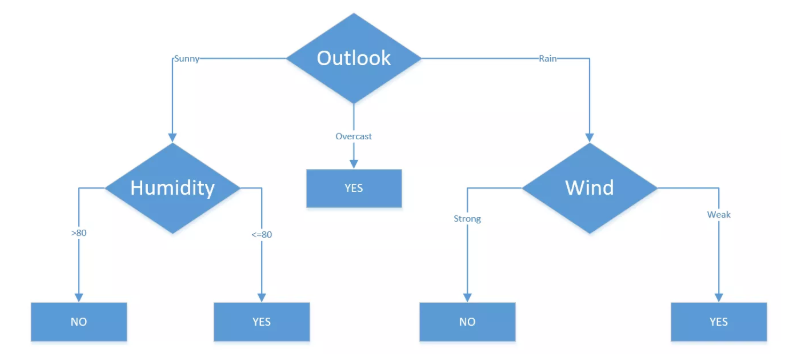